In [1]:
# Has been used the dataset https://www.kaggle.com/tongpython/cat-and-dog

# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# Directory with our training horse pictures
train_cats_dir = os.path.join('./training_set/training_set/cats')

# Directory with our training human pictures
train_dogs_dir = os.path.join('./training_set/training_set/dogs')

# Directory with our validation horse pictures
validation_cats_dir = os.path.join('./test_set/test_set/cats')

# Directory with our validation human pictures
validation_dogs_dir = os.path.join('./test_set/test_set/dogs')


In [3]:
print('total training cats images:', len(os.listdir(train_cats_dir)))
print('total training dogs images:', len(os.listdir(train_dogs_dir)))
print('total validation cats images:', len(os.listdir(validation_cats_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))

total training cats images: 4001
total training dogs images: 4006
total validation cats images: 1012
total validation dogs images: 1013


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './training_set/training_set/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=200,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './test_set/test_set/',  # This is the source directory for validation images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=100,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [6]:
# Note that this may take some time.
history = model.fit(train_generator, epochs=15, steps_per_epoch=40,
                    validation_data=validation_generator, validation_steps=20)

Epoch 1/15
40/40 [==============================] - 129s 3s/step - loss: 1.1392 - acc: 0.5416 - val_loss: 0.6692 - val_acc: 0.6050
Epoch 2/15
40/40 [==============================] - 125s 3s/step - loss: 0.7202 - acc: 0.5981 - val_loss: 0.6498 - val_acc: 0.6325
Epoch 3/15
40/40 [==============================] - 132s 3s/step - loss: 0.6359 - acc: 0.6406 - val_loss: 0.6052 - val_acc: 0.7070
Epoch 4/15
40/40 [==============================] - 131s 3s/step - loss: 0.6251 - acc: 0.6758 - val_loss: 0.5952 - val_acc: 0.6695
Epoch 5/15
40/40 [==============================] - 125s 3s/step - loss: 0.5804 - acc: 0.7144 - val_loss: 0.5606 - val_acc: 0.7125
Epoch 6/15
40/40 [==============================] - 124s 3s/step - loss: 0.5300 - acc: 0.7361 - val_loss: 0.6673 - val_acc: 0.6215
Epoch 7/15
40/40 [==============================] - 130s 3s/step - loss: 0.5220 - acc: 0.7546 - val_loss: 0.5392 - val_acc: 0.7315
Epoch 8/15
40/40 [==============================] - 128s 3s/step - loss: 0.4648 - a

<Figure size 432x288 with 0 Axes>

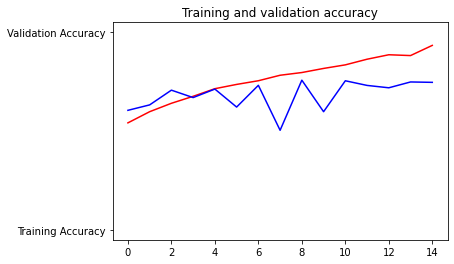

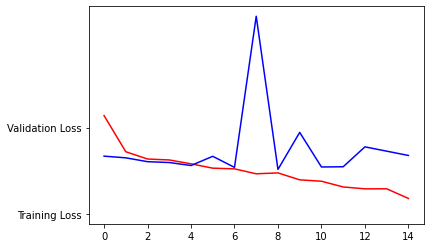

<Figure size 432x288 with 0 Axes>

In [7]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()